# Handwritten Digit Recognition on MNIST dataset

 ## Fetching Datasets

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
#  MNIST database (Modified National Institute of Standards and Technology database)
mnist = fetch_openml('mnist_784')

In [3]:
# MNIST data is already given in target and labels, so e divide tha data easily
x,y =mnist['data'],mnist['target']

In [4]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [6]:
# Checking the target or we can say labels
from pandas import unique
print(y.unique())

['5', '0', '4', '1', '9', '2', '3', '6', '7', '8']
Categories (10, object): ['5', '0', '4', '1', ..., '3', '6', '7', '8']


In [7]:
# Checking the shape of data and target
print("Image Data Shape" , mnist.data.shape)

# There are 700000 labels (integers from 0-9)
print("Label Data Shape", mnist.target.shape)

Image Data Shape (70000, 784)
Label Data Shape (70000,)


## Splitting Data into Training and Test Sets 

In [8]:
# MNIST data is already divided into train and test set. 
# The MNIST database contains 60,000 training images and 10,000 testing images.

x_train, x_test = x[:60000], x[60000:]

y_train, y_test = y[:60000], y[60000:]

In [9]:
# we will shuffle the index because in given dataset it could be numbered not random, 
# it is always best to shuffe the data or better learning.

import numpy as np

shuffle_index = np.random.permutation(70000)
x_train, y_train = mnist.data.loc[shuffle_index],mnist.target.loc[shuffle_index]

## Data Exploration

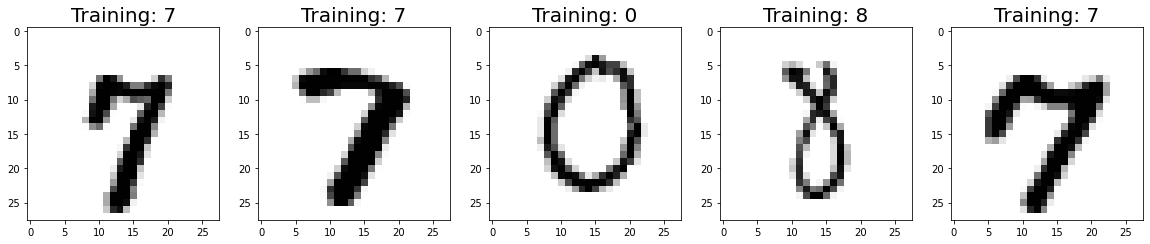

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(np.array(x_train.iloc[0:5]), np.array(y_train.iloc[0:5]))):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.binary,interpolation = "nearest")
    plt.title(f'Training: {label}', fontsize = 20)

# Model Evaluation

    - Importing our model that we want to use.
    - Using LogisticRegression as our model for multiclass classification.

In [11]:
# In sklearn, all machine learning models are implemented as Python classes
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Loading our model to train on the data
logisticRegr = LogisticRegression()

In [13]:
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [14]:
# Uses the information the model learned during the model training process
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict([x_test.iloc[3000]])

array(['6'], dtype=object)

In [15]:
# Checking the actual output
y_test.iloc[3000]

'6'

In [16]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(x_test.iloc[:5])

array(['7', '2', '1', '0', '4'], dtype=object)

In [17]:
# Checking the actual output
y_test.iloc[:5]

60000    7
60001    2
60002    1
60003    0
60004    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [18]:
# Making predictions on entire test data
predictions = logisticRegr.predict(x_test)

In [19]:
# Predicted probability score 
score = logisticRegr.score(x_test, y_test)
print(score)

0.9376


In [20]:
# Using Cross Validation Technique for better evaluation
from sklearn.model_selection import cross_val_score
pred = cross_val_score(logisticRegr, x_train, y_train, cv=3, scoring = 'accuracy')

In [21]:
# Checking the accuracy
pred.mean()

0.9191285591508401

## Evaluating Our Classifier

    - Accuracy score is not a good measure for evaluating of classifiers
    - Evaluating a classifier is trickier then evaluating a classifier.
    - We will use Confusion Matrix, Precision, Recall, and F1 score.

In [22]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(logisticRegr, x_train, y_train, cv=3)
y_train_pred

array(['7', '7', '0', ..., '9', '3', '1'], dtype=object)

#### Calculating Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[6667,    1,   24,   16,   12,   58,   52,   16,   48,    9],
       [   1, 7674,   39,   18,   10,   25,    5,   19,   73,   13],
       [  47,   77, 6240,  134,   75,   34,   85,   81,  186,   31],
       [  31,   26,  153, 6375,    9,  232,   19,   74,  158,   64],
       [  20,   22,   49,   11, 6324,   11,   62,   28,   56,  241],
       [  75,   31,   61,  232,   66, 5408,  122,   30,  216,   72],
       [  46,   19,   60,    2,   54,   75, 6571,    7,   37,    5],
       [  19,   27,   82,   46,   55,   10,    4, 6772,   24,  254],
       [  44,  120,   88,  179,   32,  179,   57,   28, 6011,   87],
       [  33,   27,   14,   96,  184,   40,    3,  198,   66, 6297]],
      dtype=int64)

#### Calculating Precision and Recall

In [24]:
from sklearn.metrics import precision_score, recall_score

print("Precision :",precision_score(y_train,y_train_pred, average = None))
print()
print("Recall :",recall_score(y_train,y_train_pred, average = None))

Precision : [0.95474724 0.95638086 0.91629956 0.8967506  0.92713678 0.89064559
 0.94140401 0.93368261 0.87432727 0.89028701]

Recall : [0.96581197 0.97422877 0.89270386 0.89273211 0.92672919 0.85664502
 0.95564282 0.92856163 0.8807326  0.90500144]


#### Calculating F1 - score

In [25]:
from sklearn.metrics import f1_score
print("f1-score :",f1_score(y_train,y_train_pred, average = None))

f1-score : [0.96024773 0.96522231 0.90434783 0.89473684 0.92693294 0.87331449
 0.94846998 0.93111508 0.87751825 0.89758392]


#### Classification Report

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred, digits=3))

              precision    recall  f1-score   support

           0      0.955     0.966     0.960      6903
           1      0.956     0.974     0.965      7877
           2      0.916     0.893     0.904      6990
           3      0.897     0.893     0.895      7141
           4      0.927     0.927     0.927      6824
           5      0.891     0.857     0.873      6313
           6      0.941     0.956     0.948      6876
           7      0.934     0.929     0.931      7293
           8      0.874     0.881     0.878      6825
           9      0.890     0.905     0.898      6958

    accuracy                          0.919     70000
   macro avg      0.918     0.918     0.918     70000
weighted avg      0.919     0.919     0.919     70000

